# Ridge, LASSO, and Elastic Net Regression

In [1]:
import numpy as np
np.random.seed(1)

### Dataset and prep

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()

In [3]:
print(boston.feature_names)
print()
print(type(boston.feature_names))
print()
print(len(boston.feature_names))

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']

<class 'numpy.ndarray'>

13


In [4]:
print(boston.data)
print()
print(type(boston.data))
print()
print(len(boston.data))

[[  6.32000000e-03   1.80000000e+01   2.31000000e+00 ...,   1.53000000e+01
    3.96900000e+02   4.98000000e+00]
 [  2.73100000e-02   0.00000000e+00   7.07000000e+00 ...,   1.78000000e+01
    3.96900000e+02   9.14000000e+00]
 [  2.72900000e-02   0.00000000e+00   7.07000000e+00 ...,   1.78000000e+01
    3.92830000e+02   4.03000000e+00]
 ..., 
 [  6.07600000e-02   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    3.96900000e+02   5.64000000e+00]
 [  1.09590000e-01   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    3.93450000e+02   6.48000000e+00]
 [  4.74100000e-02   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    3.96900000e+02   7.88000000e+00]]

<class 'numpy.ndarray'>

506


In [5]:
print(boston.target)
print()
print(type(boston.target))
print()
print(len(boston.target))

[ 24.   21.6  34.7  33.4  36.2  28.7  22.9  27.1  16.5  18.9  15.   18.9
  21.7  20.4  18.2  19.9  23.1  17.5  20.2  18.2  13.6  19.6  15.2  14.5
  15.6  13.9  16.6  14.8  18.4  21.   12.7  14.5  13.2  13.1  13.5  18.9
  20.   21.   24.7  30.8  34.9  26.6  25.3  24.7  21.2  19.3  20.   16.6
  14.4  19.4  19.7  20.5  25.   23.4  18.9  35.4  24.7  31.6  23.3  19.6
  18.7  16.   22.2  25.   33.   23.5  19.4  22.   17.4  20.9  24.2  21.7
  22.8  23.4  24.1  21.4  20.   20.8  21.2  20.3  28.   23.9  24.8  22.9
  23.9  26.6  22.5  22.2  23.6  28.7  22.6  22.   22.9  25.   20.6  28.4
  21.4  38.7  43.8  33.2  27.5  26.5  18.6  19.3  20.1  19.5  19.5  20.4
  19.8  19.4  21.7  22.8  18.8  18.7  18.5  18.3  21.2  19.2  20.4  19.3
  22.   20.3  20.5  17.3  18.8  21.4  15.7  16.2  18.   14.3  19.2  19.6
  23.   18.4  15.6  18.1  17.4  17.1  13.3  17.8  14.   14.4  13.4  15.6
  11.8  13.8  15.6  14.6  17.8  15.4  21.5  19.6  15.3  19.4  17.   15.6
  13.1  41.3  24.3  23.3  27.   50.   50.   50.   2

### Train/Test Split

In [6]:
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.utils import shuffle

X, y = shuffle(boston.data, boston.target, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

# scaler = preprocessing.StandardScaler().fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

/Users/chench/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Models

In [7]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
import numpy as np

np.random.seed(50)

lin_reg = LinearRegression()

ridge_reg = Ridge(alpha=.1,  # regularization (L2) strength
                  max_iter=1000,
                  tol=0.0001,  # when to stop
                  random_state=40,
                  solver='auto')  # or ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’

lasso_reg = Lasso(alpha=.1,  # multiples L1 penalty, a 0 is linreg
                  max_iter=1000,
                  tol=0.0001,  # when to stop
                  random_state=40,
                  selection='cyclic')  # how to update coefficients, also 'random'

en_reg = ElasticNet(alpha=.1,  # multiplies penalty, 0 is linreg
                    l1_ratio=0.5,  # ratio of L1 in penalty, 0 would be pure L2 penalty, mix of ridge and lasso
                    max_iter=1000,
                    tol=0.0001,  # when to stop
                    random_state=40,
                    selection='cyclic')  # how to update coefficients, also 'random'

lin_model = lin_reg.fit(X_train, y_train)
ridge_model = ridge_reg.fit(X_train, y_train)
lasso_model = lasso_reg.fit(X_train, y_train)
en_model = lasso_reg.fit(X_train, y_train)


print("Linear R2:\n")
print(lin_model.score(X_test, y_test))  # R2
print()
print("Ridge R2:\n")
print(ridge_model.score(X_test, y_test))  # R2
print()
print("Lasso R2:\n")
print(lasso_model.score(X_test, y_test))  # R2
print()
print("Elastic Net R2:\n")
print(en_model.score(X_test, y_test))  # R2

Linear R2:

0.777301549269

Ridge R2:

0.777411603058

Lasso R2:

0.76449364932

Elastic Net R2:

0.76449364932


/Users/chench/anaconda/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


### Compare coefficients

In [8]:
for model in (lin_model, ridge_model, lasso_model, en_model):
    print(model)
    print()
    print (model.coef_)
    print()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

[ -1.03578977e-01   5.42378069e-02   2.82037138e-02   2.81223056e+00
  -1.81392223e+01   3.29310982e+00   4.06700288e-03  -1.46741131e+00
   2.80749840e-01  -1.02891108e-02  -1.00676378e+00   1.03776202e-02
  -5.54939684e-01]

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, random_state=40, solver='auto', tol=0.0001)

[ -1.03197704e-01   5.44079954e-02   2.23811201e-02   2.78714859e+00
  -1.68141771e+01   3.30407096e+00   2.77771168e-03  -1.45001489e+00
   2.77579633e-01  -1.04007327e-02  -9.91299646e-01   1.04473186e-02
  -5.56186469e-01]

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=40,
   selection='cyclic', tol=0.0001, warm_start=False)

[-0.09747232  0.05741137 -0.03371913  1.04143348 -0.          3.2049459
 -0.00902377 -1.17808084  0.24726673 -0.01259232 -0.80293305  0.01149443
 -0

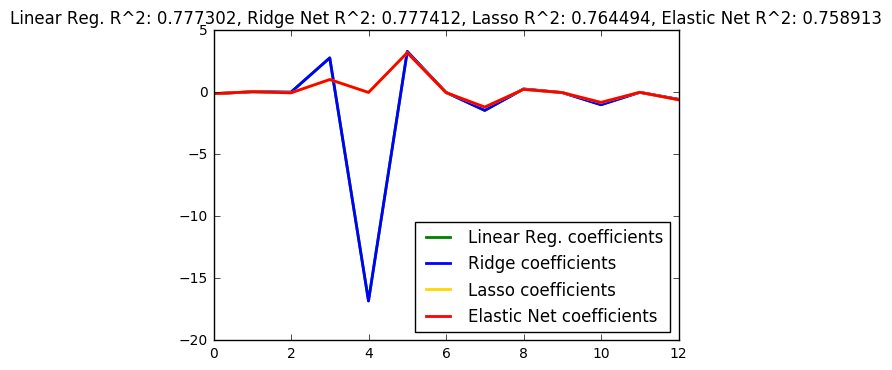

In [9]:
% matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

y_pred_lin = lin_reg.fit(X_train, y_train).predict(X_test)
y_pred_en = en_reg.fit(X_train, y_train).predict(X_test)
y_pred_lasso = lasso_reg.fit(X_train, y_train).predict(X_test)
y_pred_ridge = ridge_reg.fit(X_train, y_train).predict(X_test)

plt.plot(ridge_model.coef_, color='green', linewidth=2, label='Linear Reg. coefficients')
plt.plot(ridge_model.coef_, color='blue', linewidth=2, label='Ridge coefficients')
plt.plot(lasso_model.coef_, color='gold', linewidth=2, label='Lasso coefficients')
plt.plot(en_model.coef_, color='red', linewidth=2, label='Elastic Net coefficients')

# plt.plot(coef, '--', color='navy', label='original coefficients')
plt.legend(loc='best')
plt.title("Linear Reg. R^2: %f, Ridge Net R^2: %f, Lasso R^2: %f, Elastic Net R^2: %f"
          % (r2_score(y_test, y_pred_lin), r2_score(y_test, y_pred_ridge), r2_score(y_test, y_pred_lasso), r2_score(y_test, y_pred_en)))
plt.show()

### CV Models

In [10]:
from sklearn.model_selection import cross_val_score
lin_scores = cross_val_score(lin_reg, boston.data, boston.target, cv=5)
ridge_scores = cross_val_score(ridge_reg, boston.data, boston.target, cv=5)
lasso_scores = cross_val_score(lasso_reg, boston.data, boston.target, cv=5)
en_scores = cross_val_score(en_reg, boston.data, boston.target, cv=5)

print("Linear Reg. CV R2:\n")
print(lin_scores, "---Average:", np.mean(lin_scores))  # R2
print()
print("Ridge CV R2:\n")
print(ridge_scores, "---Average:", np.mean(ridge_scores))  # R2
print()
print("Lasso CV R2:\n")
print(lasso_scores, "---Average:", np.mean(lasso_scores))  # R2
print()
print("Elastic Net CV R2:\n")
print(en_scores, "---Average:", np.mean(en_scores))  # R2

Linear Reg. CV R2:

[ 0.63861069  0.71334432  0.58645134  0.07842495 -0.26312455] ---Average: 0.350741350933

Ridge CV R2:

[ 0.64270074  0.72281614  0.59446504  0.07907754 -0.24666381] ---Average: 0.358479131388

Lasso CV R2:

[ 0.67465461  0.73260743  0.63221137  0.09407457 -0.12839199] ---Average: 0.401031199074

Elastic Net CV R2:

[ 0.66149155  0.72486107  0.62129923  0.21353879 -0.00841982] ---Average: 0.442554165173


## Grid Search

In [11]:
from sklearn.model_selection import GridSearchCV

for m in [Ridge(), Lasso(), ElasticNet()]:

    param_grid = {'alpha': np.arange(.01, 1, .01)}

    model_r = GridSearchCV(m, param_grid)
    model_r.fit(X_train, y_train)
    
    print(model_r)

    best_index = np.argmax(model_r.cv_results_["mean_test_score"])

    print(model_r.cv_results_["params"][best_index])
    print(max(model_r.cv_results_["mean_test_score"]))
    print(model_r.score(X_test, y_test))
    print("---"*10)

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([ 0.01,  0.02, ...,  0.98,  0.99])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)
{'alpha': 0.050000000000000003}
0.703900909882
0.777372002641
------------------------------
GridSearchCV(cv=None, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([ 0.01,  0.02, ...,  0.98,  0.99])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)
{'alpha': 0.01}
0.703588046464
0.777